# Exemplo para Análise de Risco de Crédito Bancário

Contexto de Negócio para concessão de crédito:
- O banco deseja conceder crédito aos clientes de acordo com o risco de crédito.
- O banco deseja automatizar o processo de decisão de crédito.
- O banco deseja minimizar a inadimplência de crédito.
- O banco deseja maximizar a carteira de crédito.

## Para execução é necessário o "scikit-fuzzy". Instale com:

Conda:
```
conda install conda-forge::scikit-fuzzy
```

Pip:
```
pip install scikit-fuzzy
```

Calculated risk: 62.418781725888415


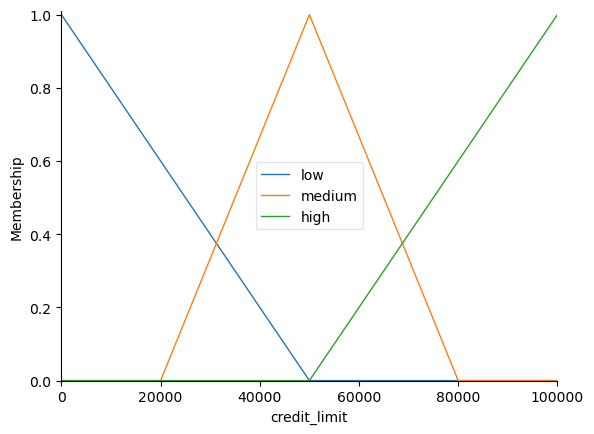

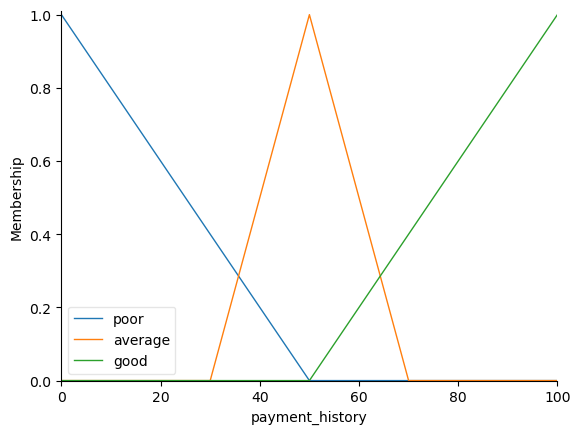

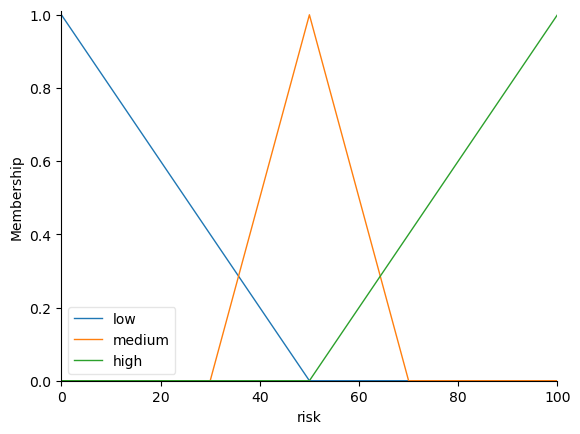

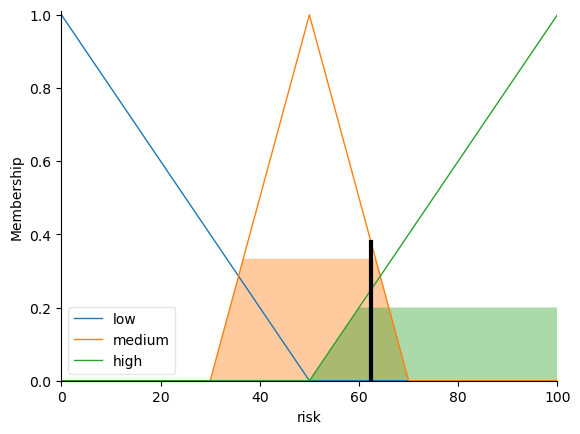

In [6]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Definindo as variáveis de entrada e saída do sistema fuzzy
credit_limit = ctrl.Antecedent(np.arange(0, 100001, 1000), 'credit_limit')
payment_history = ctrl.Antecedent(np.arange(0, 101, 1), 'payment_history')

risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Funções de pertinência para 'credit_limit'
credit_limit['low'] = fuzz.trimf(credit_limit.universe, [0, 0, 50000])
credit_limit['medium'] = fuzz.trimf(credit_limit.universe, [20000, 50000, 80000])
credit_limit['high'] = fuzz.trimf(credit_limit.universe, [50000, 100000, 100000])

# Funções de pertinência para 'payment_history'
payment_history['poor'] = fuzz.trimf(payment_history.universe, [0, 0, 50])
payment_history['average'] = fuzz.trimf(payment_history.universe, [30, 50, 70])
payment_history['good'] = fuzz.trimf(payment_history.universe, [50, 100, 100])

# Funções de pertinência para 'risk'
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])

# Visualização das funções de pertinência (opcional)
credit_limit.view()
payment_history.view()
risk.view()

# Definindo as regras fuzzy
rule1 = ctrl.Rule(credit_limit['low'] & payment_history['poor'], risk['high'])
rule2 = ctrl.Rule(credit_limit['low'] & payment_history['good'], risk['medium'])
rule3 = ctrl.Rule(credit_limit['medium'] & payment_history['poor'], risk['high'])
rule4 = ctrl.Rule(credit_limit['medium'] & payment_history['average'], risk['medium'])
rule5 = ctrl.Rule(credit_limit['medium'] & payment_history['good'], risk['low'])
rule6 = ctrl.Rule(credit_limit['high'] & payment_history['poor'], risk['medium'])
rule7 = ctrl.Rule(credit_limit['high'] & payment_history['good'], risk['low'])

# Criando o sistema de controle e a simulação
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Exemplo de entrada: Limite de crédito de 30000 e histórico de pagamento de 40
risk_simulation.input['credit_limit'] = 30000
risk_simulation.input['payment_history'] = 40

# Computa o resultado do sistema fuzzy
risk_simulation.compute()
print("Calculated risk:", risk_simulation.output['risk'])

# Visualiza o resultado na função de pertinência de risco
risk.view(sim=risk_simulation)
plt.show()